word_count_range
0-100       28
100-250    145
251-500    171
>501       126
Name: count, dtype: int64


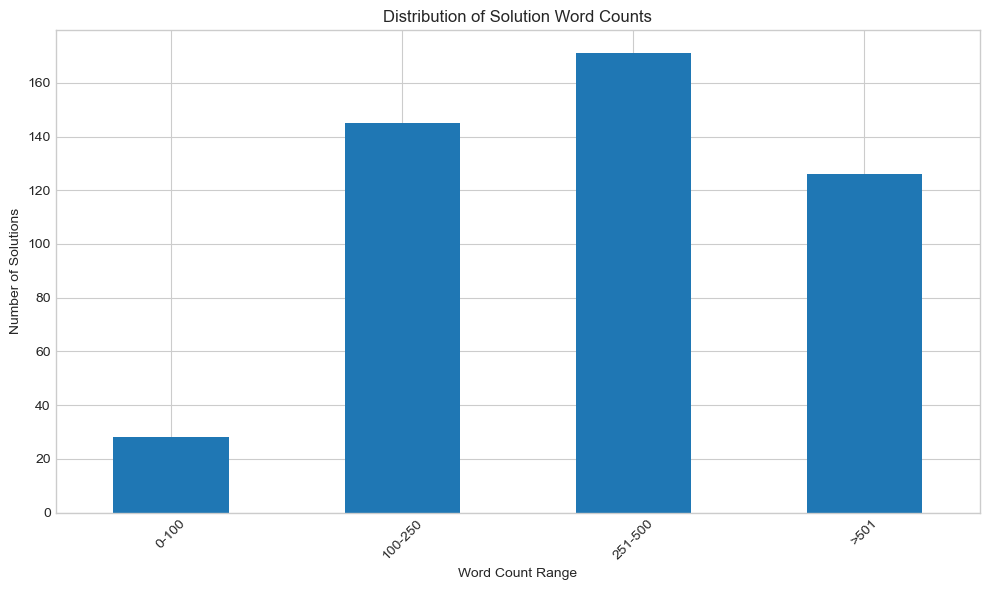

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('RIMO-P.csv')

# Calculate the length of the words in the 'solution' column
df['solution_word_count'] = df['solution'].str.split().str.len()

# Define the bins and labels for the word count ranges
bins = [0,100, 250, 500, float('inf')]
labels = ['0-100','100-250', '251-500', '>501']

# Create a new column with the word count category
df['word_count_range'] = pd.cut(df['solution_word_count'], bins=bins, labels=labels, right=True)

# Count the number of solutions in each range
word_count_distribution = df['word_count_range'].value_counts().sort_index()

# Create a bar chart of the distribution
plt.figure(figsize=(10, 6))
word_count_distribution.plot(kind='bar')
plt.xlabel('Word Count Range')
plt.ylabel('Number of Solutions')
plt.title('Distribution of Solution Word Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('solution_word_count_distribution.png')

print(word_count_distribution)

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('RIMO-P.csv')

# Calculate the length of the words in the 'solution' column
df['solution_word_count'] = df['solution'].str.split().str.len()

# Filter for solutions with a word count between 201 and 400
# filtered_df = df[(df['solution_word_count'] >= 201) & (df['solution_word_count'] <= 400)]
filtered_df = df[(df['solution_word_count'] <= 201)]

# Get the first example from the filtered dataframe
if not filtered_df.empty:
    example = filtered_df.iloc[0]
    print("Problem ID:")
    print(example['problem_id'])
    print("Problem:")
    print(example['problem'])
    print("\nSolution:")
    print(example['solution'])
    print(f"\nWord Count: {example['solution_word_count']}")
else:
    print("No solutions found in the 201-400 word count range.")

Problem ID:
2023a2
Problem:
Let $\mathbb{R}$ be the set of real numbers. Let $f: \mathbb{R} \rightarrow \mathbb{R}$ be a function such that

$$
f(x+y) f(x-y) \geqslant f(x)^{2}-f(y)^{2}
$$

for every $x, y \in \mathbb{R}$. Assume that the inequality is strict for some $x_{0}, y_{0} \in \mathbb{R}$.\\
Prove that $f(x) \geqslant 0$ for every $x \in \mathbb{R}$ or $f(x) \leqslant 0$ for every $x \in \mathbb{R}$.

Solution:
We introduce the new variables $s:=x+y$ and $t:=x-y$. Equivalently, $x=\frac{s+t}{2}$ and $y=\frac{s-t}{2}$. The inequality becomes

$$
f(s) f(t) \geqslant f\left(\frac{s+t}{2}\right)^{2}-f\left(\frac{s-t}{2}\right)^{2}
$$

for every $s, t \in \mathbb{R}$. We replace $t$ by $-t$ to obtain

$$
f(s) f(-t) \geqslant f\left(\frac{s-t}{2}\right)^{2}-f\left(\frac{s+t}{2}\right)^{2}
$$

Summing the previous two inequalities gives

$$
f(s)(f(t)+f(-t)) \geqslant 0
$$

for every $s, t \in \mathbb{R}$. This inequality is strict for $s=x_{0}+y_{0}$ and $t=x_{0}-y_{0}$ by assumption

In [15]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('RIMO-P.csv')
except FileNotFoundError:
    print("Error: 'RIMO-P.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Ensure the 'solution' column exists and handle potential missing values
if 'solution' in df.columns:
    df['solution'] = df['solution'].fillna('')
else:
    print("Error: 'solution' column not found in the CSV file.")
    exit()

# Calculate the word count for the 'solution' column
df['solution_word_count'] = df['solution'].str.split().str.len()

# Define the bins and labels for the 'parts' column
bins = [0, 100, 250, 500, float('inf')]
labels = [1, 2, 3, 4]

# Create the 'parts' column based on the word count
df['parts'] = pd.cut(df['solution_word_count'], bins=bins, labels=labels, right=True)

# Define the list of columns for the output file in the desired order
output_columns = ['problem_id', 'problem', 'solution', 'solution_word_count', 'parts']

# Create a new DataFrame with only the specified columns
output_df = df[output_columns]

# Save the new DataFrame to a new CSV file
output_filename = 'RIMO-P_with_parts.csv'
output_df.to_csv(output_filename, index=False)

print(f"Successfully created '{output_filename}' with the specified 5 columns.")
# Display the head of the new dataframe to verify
print("\nHere's a preview of the final output:")
print(output_df.head())



Successfully created 'RIMO-P_with_parts.csv' with the specified 5 columns.

Here's a preview of the final output:
  problem_id                                            problem  \
0     2023a2  Let $\mathbb{R}$ be the set of real numbers. L...   
1     2023a3  Let $x_{1}, x_{2}, \ldots, x_{2023}$ be distin...   
2     2023a5  Let $a_{1}, a_{2}, \ldots, a_{2023}$ be positi...   
3     2023a7  Let $N$ be a positive integer. Prove that ther...   
4     2023c5  Elisa has 2023 treasure chests, all of which a...   

                                            solution  solution_word_count  \
0  We introduce the new variables $s:=x+y$ and $t...                   96   
1  We start with some basic observations. First n...                  229   
2  Let $N$ be a positive integer and $a_{1}, a_{2...                  184   
3  The idea is to approximate the numbers $\sqrt{...                  629   
4  We will prove that such a constant $C$ exists ...                  684   

  parts  
0     1  
